In [20]:
import numpy as np
import scipy.stats as sts
pts = np.loadtxt('incomes.txt')
pts[:10]

array([ 51253.49715631, 100630.32024137,  83009.27613739,  82882.10654304,
        77338.29483892,  81071.64131675,  84760.04353269,  74599.0967193 ,
        94687.36110452,  76720.48678222])

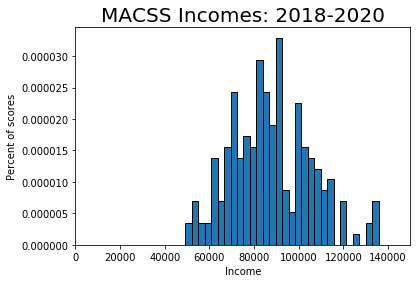

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(pts, 30, edgecolor='black', normed=True)
plt.title('MACSS Incomes: 2018-2020', fontsize=20)
plt.xlabel('Income')
plt.ylabel('Percent of scores')
plt.xlim([0, 150000])
plt.show()

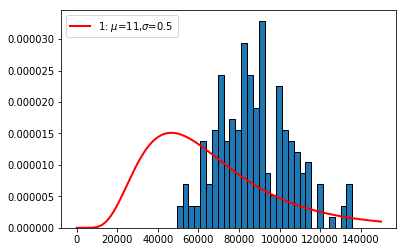

In [22]:
def lognorm_pdf(xvals, mu, sigma):
    pdf_vals    = (1/(xvals * sigma * np.sqrt(2 * np.pi)) * 
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2)))
    return pdf_vals

dist_pts = np.linspace(1, 150000, 500)
mu_1 = 11
sig_1 = 0.5
plt.hist(pts, 30, edgecolor='black', normed=True)
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_1, sig_1),
         linewidth=2, color='r', label='1: $\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')
plt.show()

In [11]:
def log_lik_lognorm(xvals, mu, sigma):
    pdf_vals = lognorm_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum() 
    return log_lik_val

print('Log-likelihood 1: ', log_lik_lognorm(pts, mu_1, sig_1))

Log-likelihood 1:  -2385.856997808558


In [12]:
def crit(params, *args):
    mu, sigma = params
    xvals = args[0]
    log_lik_val = log_lik_lognorm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [24]:
import scipy.optimize as opt
mu_init = 11  # mu_2
sig_init = 0.5  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = (pts,)
results = opt.minimize(crit, params_init, args=(mle_args))
#mu_MLE, sig_MLE = results.x
#print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

TypeError: 'numpy.float64' object cannot be interpreted as an integer